In [1]:
## Importing libraries

## Data Manipulation:
import pandas as pd
import numpy as np

## Data Visualization:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from plotly.offline import iplot, init_notebook_mode
import plotly.express as px

## Correlation
from scipy.stats.stats import pearsonr

In [2]:
# read the turnover.csv and assign it to a variable for future use
employee_data = pd.read_csv("../../turnover.csv", engine = "python", encoding = "ISO-8859-1")
employee_data.head()


,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


In [3]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


In [4]:
## Unique values for string columns
for column in employee_data.select_dtypes(include = 'object'):
    print(column.upper() + ': ', end = "") ## Continue printing on the same line
    print(*list(employee_data[column].unique()), sep = "; ") ## Print each element of the list, separate them with "; 

GENDER: m; f
INDUSTRY: Banks; PowerGeneration; Retail; manufacture; Consult; State; etc; Building; IT;  HoReCa; Telecom; Pharma; Mining; transport; Agriculture; RealEstate
PROFESSION: HR; Commercial; Marketing; etc; Sales; BusinessDevelopment; Finanñe; Teaching; manage; IT; Law; Consult; Engineer; PR; Accounting
TRAFFIC: rabrecNErab; empjs; youjs; referal; advert; KA; recNErab; friends
COACH: no; yes; my head
HEAD_GENDER: f; m
GREYWAGE: white; grey
WAY: bus; car; foot


In [5]:
#Merge "my head" and "yes" values together, create "has_coach" column for those where the supervisor is also the coach
#Remove the "coach" column - it's redundant
employee_data['has_coach'] = employee_data["coach"]\
    .apply(lambda c: "no" if c != 'no' else "yes")\
    .astype("category")
employee_data = employee_data.drop(["coach"], axis=1)

employee_data.head()

,stag,event,gender,age,industry,profession,traffic,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,has_coach
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,f,white,bus,6.2,4.1,5.7,7.1,8.3,yes
1,22.965092,1,m,33.0,Banks,HR,empjs,m,white,bus,6.2,4.1,5.7,7.1,8.3,yes
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,m,white,bus,6.2,6.2,2.6,4.8,8.3,yes
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,m,white,bus,5.4,7.6,4.9,2.5,6.7,yes
4,8.410678,1,m,32.0,Retail,Commercial,youjs,f,white,bus,3.0,4.1,8.0,7.1,3.7,no


In [6]:
## I'll also make a "years_tenure" column, as announced above

employee_data["years_tenure"] = employee_data["stag"] / 12

round(employee_data[["stag", "years_tenure"]].head(), 2)

,stag,years_tenure
0,7.03,0.59
1,22.97,1.91
2,15.93,1.33
3,15.93,1.33
4,8.41,0.70


In [7]:
## Looks good, so I'll remove the "stag" column - it's redundant

employee_data = employee_data.drop(["stag"], axis=1)
employee_data.head()

,event,gender,age,industry,profession,traffic,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,has_coach,years_tenure
0,1,m,35.0,Banks,HR,rabrecNErab,f,white,bus,6.2,4.1,5.7,7.1,8.3,yes,0.585900
1,1,m,33.0,Banks,HR,empjs,m,white,bus,6.2,4.1,5.7,7.1,8.3,yes,1.913758
2,1,f,35.0,PowerGeneration,HR,rabrecNErab,m,white,bus,6.2,6.2,2.6,4.8,8.3,yes,1.327858
3,1,f,35.0,PowerGeneration,HR,rabrecNErab,m,white,bus,5.4,7.6,4.9,2.5,6.7,yes,1.327858
4,1,m,32.0,Retail,Commercial,youjs,f,white,bus,3.0,4.1,8.0,7.1,3.7,no,0.700890


In [8]:
## Let's turn all string columns to categoric columns - since that's what they should be,
## as we've seen above

for column in employee_data.select_dtypes(include = ["object"]).columns:
    employee_data[column] = employee_data[column].astype("category")

In [9]:
## Recheck info after conversions
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   event         1129 non-null   int64   
 1   gender        1129 non-null   category
 2   age           1129 non-null   float64 
 3   industry      1129 non-null   category
 4   profession    1129 non-null   category
 5   traffic       1129 non-null   category
 6   head_gender   1129 non-null   category
 7   greywage      1129 non-null   category
 8   way           1129 non-null   category
 9   extraversion  1129 non-null   float64 
 10  independ      1129 non-null   float64 
 11  selfcontrol   1129 non-null   float64 
 12  anxiety       1129 non-null   float64 
 13  novator       1129 non-null   float64 
 14  has_coach     1129 non-null   category
 15  years_tenure  1129 non-null   float64 
dtypes: category(8), float64(7), int64(1)
memory usage: 81.9 KB


In [10]:
#employee_data.to_csv('employee_data.csv', encoding='utf-8')

In [11]:
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder

all_columns_dict = {}

print('Categorical columns: ')
for col in sorted(list(employee_data.select_dtypes("category").columns)):
        
    old_values = sorted(list(employee_data[col].unique()))
        
    print(str(col).upper())

    label = LabelEncoder()
    label = label.fit(employee_data[col])
    employee_data[col] = label.transform(employee_data[col].astype(str))

    new_values = sorted(list(employee_data[col].unique()))
    mini_dict = {}
    i = 0
    for item in old_values:
        mini_dict[item] = list(new_values)[i]
        print(f"\t - {item} : {list(new_values)[i]}")
        i += 1
    
    all_columns_dict[col] = mini_dict

Categorical columns: 
GENDER
	 - f : 0
	 - m : 1
GREYWAGE
	 - grey : 0
	 - white : 1
HAS_COACH
	 - no : 0
	 - yes : 1
HEAD_GENDER
	 - f : 0
	 - m : 1
INDUSTRY
	 -  HoReCa : 0
	 - Agriculture : 1
	 - Banks : 2
	 - Building : 3
	 - Consult : 4
	 - IT : 5
	 - Mining : 6
	 - Pharma : 7
	 - PowerGeneration : 8
	 - RealEstate : 9
	 - Retail : 10
	 - State : 11
	 - Telecom : 12
	 - etc : 13
	 - manufacture : 14
	 - transport : 15
PROFESSION
	 - Accounting : 0
	 - BusinessDevelopment : 1
	 - Commercial : 2
	 - Consult : 3
	 - Engineer : 4
	 - Finanñe : 5
	 - HR : 6
	 - IT : 7
	 - Law : 8
	 - Marketing : 9
	 - PR : 10
	 - Sales : 11
	 - Teaching : 12
	 - etc : 13
	 - manage : 14
TRAFFIC
	 - KA : 0
	 - advert : 1
	 - empjs : 2
	 - friends : 3
	 - rabrecNErab : 4
	 - recNErab : 5
	 - referal : 6
	 - youjs : 7
WAY
	 - bus : 0
	 - car : 1
	 - foot : 2


In [12]:
employee_data.head()

,event,gender,age,industry,profession,traffic,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,has_coach,years_tenure
0,1,1,35.0,2,6,4,0,1,0,6.2,4.1,5.7,7.1,8.3,1,0.585900
1,1,1,33.0,2,6,2,1,1,0,6.2,4.1,5.7,7.1,8.3,1,1.913758
2,1,0,35.0,8,6,4,1,1,0,6.2,6.2,2.6,4.8,8.3,1,1.327858
3,1,0,35.0,8,6,4,1,1,0,5.4,7.6,4.9,2.5,6.7,1,1.327858
4,1,1,32.0,10,2,7,0,1,0,3.0,4.1,8.0,7.1,3.7,0,0.700890


In [13]:
y = employee_data["age"]
X_baseline = employee_data[["years_tenure"]]

In [14]:
import statsmodels.api as sm
X_second = employee_data[["years_tenure", "event"]]
X_second

,years_tenure,event
0,0.585900,1
1,1.913758,1
2,1.327858,1
3,1.327858,1
4,0.700890,1
...,...,...
1124,0.884326,0
1125,0.884326,0
1126,9.900068,0
1127,4.117728,0


In [15]:
second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()

print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     24.91
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.60e-11
Time:                        13:17:46   Log-Likelihood:                -3773.4
No. Observations:                1129   AIC:                             7553.
Df Residuals:                    1126   BIC:                             7568.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           32.9850      0.370     89.187   

In [16]:
import statsmodels.api as sm
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     45.69
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           2.22e-11
Time:                        13:17:46   Log-Likelihood:                -3775.4
No. Observations:                1129   AIC:                             7555.
Df Residuals:                    1127   BIC:                             7565.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           32.5504      0.300    108.582   

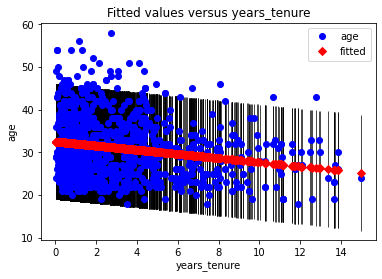

In [17]:
sm.graphics.plot_fit(baseline_results, "years_tenure")
plt.show()

In [18]:
employee_data.corr()

,event,gender,age,industry,profession,traffic,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator,has_coach,years_tenure
event,1.000000,-0.018917,-0.048751,-0.064898,0.033031,-0.015078,0.041259,-0.049166,-0.067470,0.015458,0.051864,-0.040040,-0.063232,0.006825,0.020177,-0.048361
gender,-0.018917,1.000000,0.055559,-0.018343,0.069097,-0.027809,0.211305,0.019874,0.063631,-0.146428,-0.124849,0.075138,0.319064,0.011070,0.076016,0.042269
age,-0.048751,0.055559,1.000000,0.094457,-0.120165,-0.112726,0.197833,-0.028580,0.060681,-0.149753,0.056129,0.038996,0.057782,0.039509,0.296160,-0.197381
industry,-0.064898,-0.018343,0.094457,1.000000,0.038143,0.007050,0.002100,-0.042358,0.032720,-0.027950,-0.083249,0.084204,0.040872,-0.062133,0.051454,0.071454
profession,0.033031,0.069097,-0.120165,0.038143,1.000000,-0.061871,0.003221,-0.018734,0.065788,0.026550,0.007971,-0.069070,-0.029883,0.052465,0.017347,-0.051548
traffic,-0.015078,-0.027809,-0.112726,0.007050,-0.061871,1.000000,-0.001959,0.025800,-0.067533,-0.057952,-0.049713,0.107039,-0.051959,-0.098425,-0.079021,0.008434
head_gender,0.041259,0.211305,0.197833,0.002100,0.003221,-0.001959,1.000000,-0.029769,0.007186,-0.006274,-0.045154,-0.041462,0.042197,0.042840,0.107700,-0.006827
greywage,-0.049166,0.019874,-0.028580,-0.042358,-0.018734,0.025800,-0.029769,1.000000,0.072780,-0.013582,0.099136,0.022168,-0.068037,0.011802,-0.041115,0.120718
way,-0.067470,0.063631,0.060681,0.032720,0.065788,-0.067533,0.007186,0.072780,1.000000,0.022296,-0.023380,-0.037490,0.067713,0.085969,0.080912,0.074214
extraversion,0.015458,-0.146428,-0.149753,-0.027950,0.026550,-0.057952,-0.006274,-0.013582,0.022296,1.000000,-0.200052,-0.538039,-0.135046,0.297375,-0.079879,-0.088227


In [19]:
employee_data.corr()["anxiety"]

event          -0.063232
gender          0.319064
age             0.057782
industry        0.040872
profession     -0.029883
traffic        -0.051959
head_gender     0.042197
greywage       -0.068037
way             0.067713
extraversion   -0.135046
independ       -0.427209
selfcontrol    -0.107568
anxiety         1.000000
novator         0.246668
has_coach       0.057240
years_tenure    0.014755
Name: anxiety, dtype: float64

In [20]:
employee_data.corr.employee_data.plot.scatter(x="years_tenure", y="age")

AttributeError: 'function' object has no attribute 'employee_data'

In [21]:
E = employee_data.corr()
E.plot.line(x="", y=None)

KeyError: ''

In [22]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import sys
import matplotlib
matplotlib.use('Agg')
matplotlib.pyplot.savefig('filename')

<Figure size 432x288 with 0 Axes>

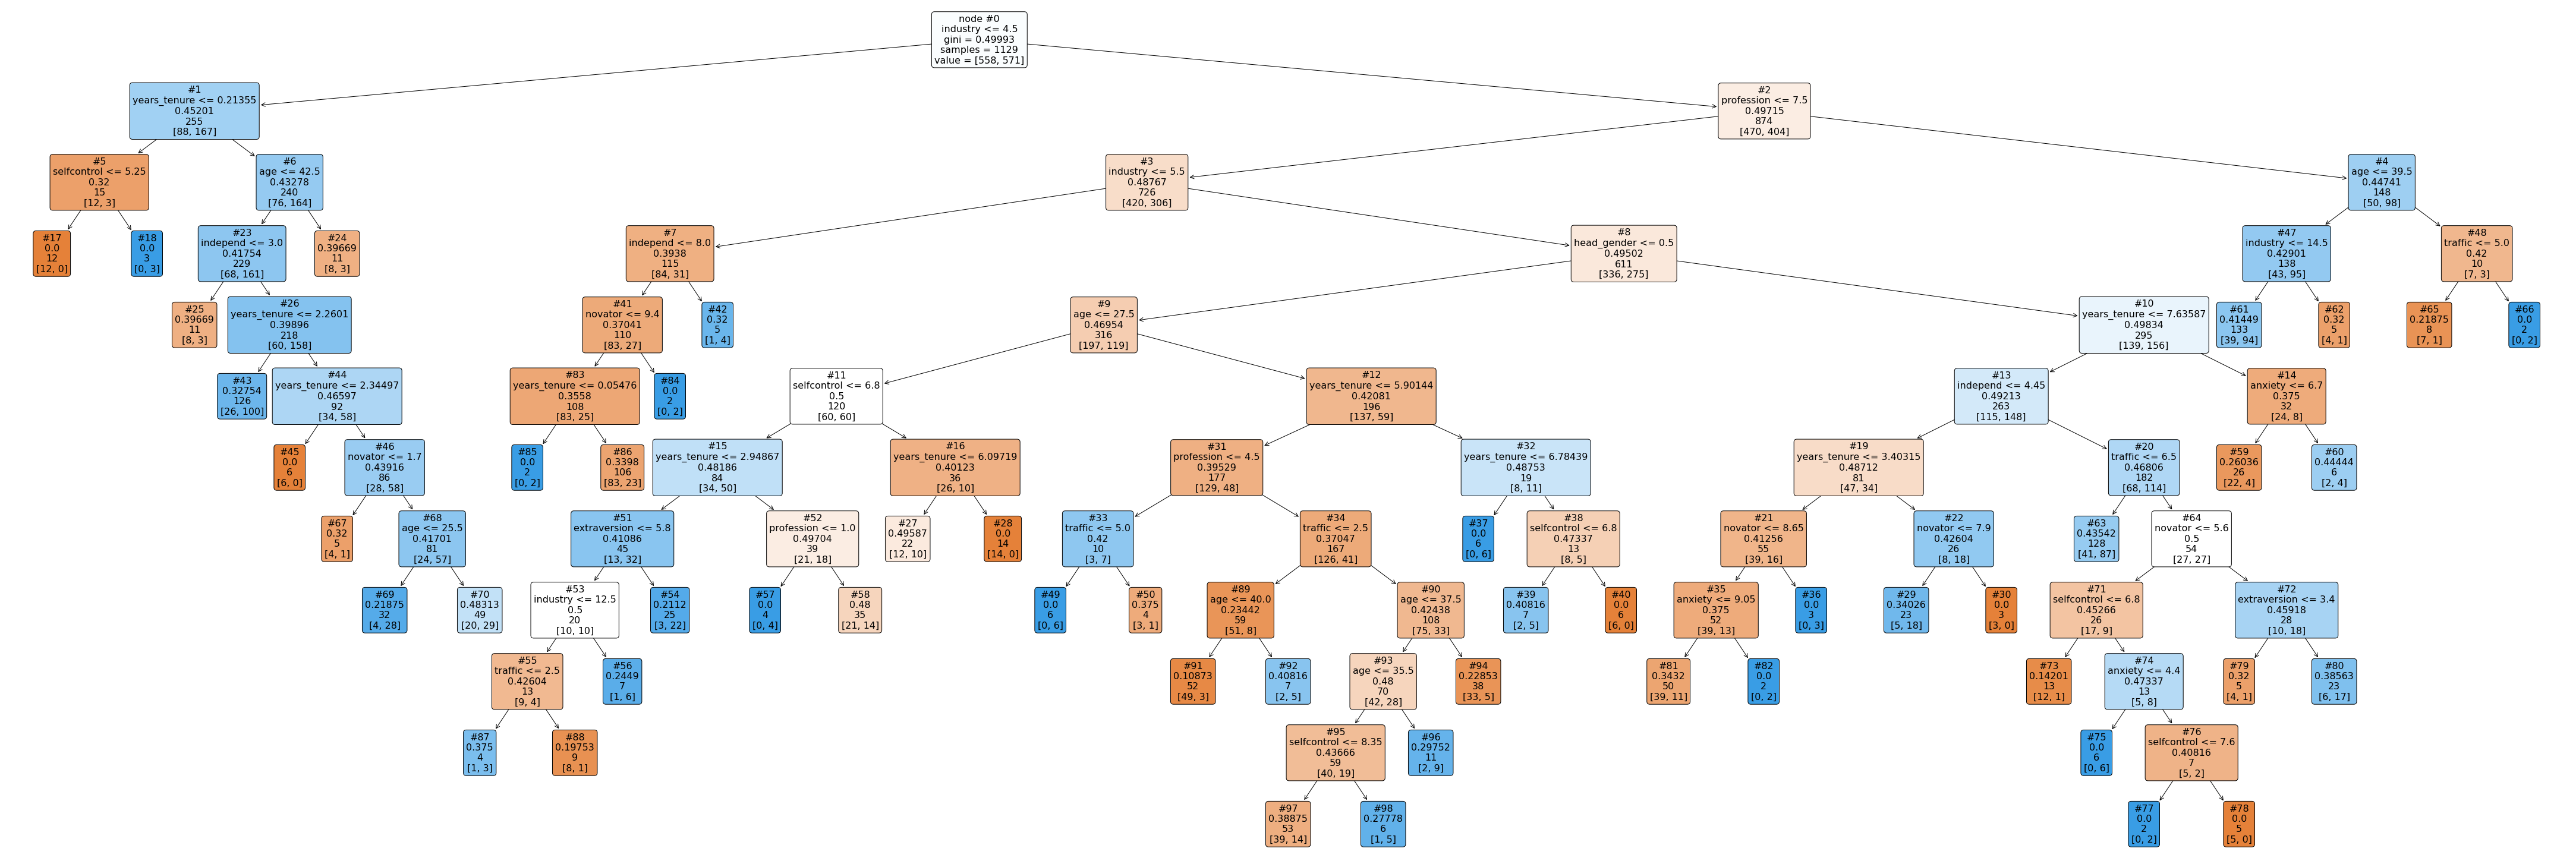

In [39]:
features = ["age", "gender","years_tenure", "industry", "profession", "has_coach", "traffic", "head_gender", "extraversion", "independ", "selfcontrol", "anxiety", "novator"]

X = employee_data[features]
y = employee_data['event']

dtree = DecisionTreeClassifier(max_leaf_nodes=50,random_state=0)
dtree = dtree.fit(X, y)
#ax = plt.subplots(figsize=(30,30))
fig = plt.figure()

tree.plot_tree(dtree, max_depth=30, feature_names=features, class_names=None, label='root', filled=True, impurity=True, node_ids=True, proportion=False, rounded=True, precision=5, ax=fig.add_axes([20,20,10,5]), fontsize=16 )
#tree.plot_tree(dtree, feature_names=features) 
plt.savefig("Decision_Tree")
sys.stdout.flush()

In [ ]:
corr = employee_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(employee_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(employee_data.columns)
ax.set_yticklabels(employee_data.columns)
plt.show()

In [ ]:
employee_data.plot.graph(x="years_tenure", y="industry" );

In [ ]:
relevant_columns = ['Pclass', 'Age', 'SibSp', 'Sex', 'Survived']
dummy_dataframe = pd.get_dummies(df[relevant_columns], drop_first=True, dtype=float)

dummy_dataframe = dummy_dataframe.dropna()

y = dummy_dataframe['Survived']
X = dummy_dataframe.drop(columns=['Survived'], axis=1)

X = sm.tools.add_constant(X)
logit_model = sm.Logit(y, X)
result = logit_model.fit()

result.summary()